In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

In [2]:
ds = xr.tutorial.open_dataset("rasm")  # use xr.tutorial.load_dataset() for xarray<v0.11.0
ds

<xarray.Dataset> Size: 17MB
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB ...
    yc       (y, x) float64 451kB ...
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 16MB ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

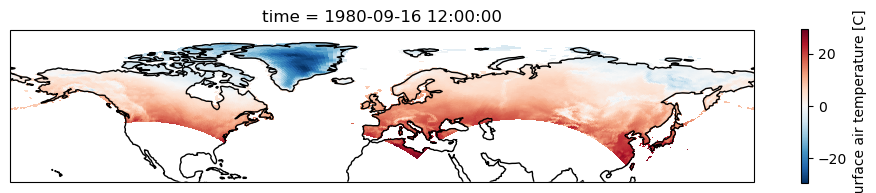

In [5]:
dr = ds["Tair"]
plt.figure(figsize=(12, 2))
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, x="xc", y="yc")
ax.coastlines()

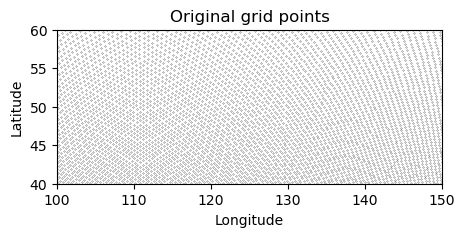

In [ ]:
plt.figure(figsize=(12, 2))
plt.scatter(dr["xc"], dr["yc"], c="k", s=0.04)
plt.xlim([100, 150])
plt.ylim([40, 60])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Original grid points")
plt.gca().set_aspect("equal", adjustable="box") #makes sure the x and y axes have the same scale so the plot isn’t stretched or squashed.

In [ ]:
ds = ds.rename({"xc": "lon", "yc": "lat"})

In [17]:
dr

<xarray.DataArray 'Tair' (time: 36, y: 205, x: 275)> Size: 16MB
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ..., 26.802619, 27.086035],
        [      nan,       nan, ..., 26.564739, 26.730649]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ..., 24.29624 , 24.614224],
        [      nan,       nan, ..., 24.299677, 24.454399]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ..., 27.311049, 27.673872],
        [      nan,       nan, ..., 27.008894, 27.23018 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ..., 28.422736, 28.687212],
        [      nan,       nan, ..., 28.185955, 28.20753 ]]],
      shape=(36, 205, 275))
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB 189.2 189.4 189.6 189.7 ... 17.4 17.15 16.91
    yc       (y, x) float64 451kB 16.53 16.78 17.02 17.27 ... 28.01 27.76 27.51
Dimensions without coordinates: y, x
Attributes:
    units:           C
    long_name:       Surface air temperature
    type_preferred:  double
    time_rep:        instantaneous

KeysView(<xarray.Dataset> Size: 263kB
Dimensions:  (y: 45, x: 180, y_b: 46, x_b: 181)
Coordinates:
    lon      (y, x) float64 65kB -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
    lat      (y, x) float64 65kB -88.0 -88.0 -88.0 -88.0 ... 88.0 88.0 88.0 88.0
    lon_b    (y_b, x_b) float64 67kB -180.0 -178.0 -176.0 ... 176.0 178.0 180.0
    lat_b    (y_b, x_b) float64 67kB -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    *empty*)


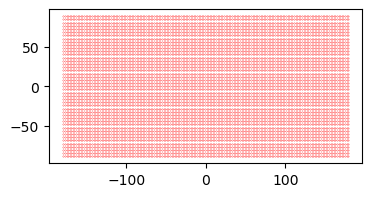

In [ ]:
ds_out = xe.util.grid_global(5, 4)
print(ds_out.keys())
# lon_b is the boundary of the longitude grid cells
# lat_b is the boundary of the latitude grid cells
# lon and lat are the center of the grid cells
plt.figure(figsize=(12, 2))
plt.scatter(ds_out["lon"], ds_out["lat"], c="r", s=0.04)
plt.gca().set_aspect("equal", adjustable="box") #makes sure the x and y axes have the same scale so the plot isn’t stretched or squashed.

In [28]:
regridder = xe.Regridder(ds, ds_out, "bilinear")
dr_out = regridder(dr)
print(dr_out.coords)
print(dr.coords)


Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    lon      (y, x) float64 65kB -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
    lat      (y, x) float64 65kB -88.0 -88.0 -88.0 -88.0 ... 88.0 88.0 88.0 88.0
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB 189.2 189.4 189.6 189.7 ... 17.4 17.15 16.91
    yc       (y, x) float64 451kB 16.53 16.78 17.02 17.27 ... 28.01 27.76 27.51


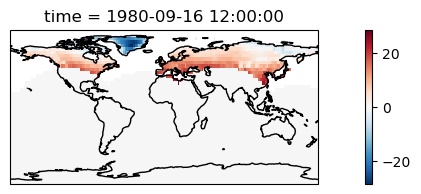

In [29]:
plt.figure(figsize=(12, 2))
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=0).plot.pcolormesh(ax=ax, x="lon", y="lat")
ax.coastlines()